# Assignment Nine
---
Oisín Morrison - 26/02/20 - Hw9.ipynb

---

This assignment is in relation to the use of Fourier Transforms in image analysis.

In [1]:
#standard imports for data science with python
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import scipy
import sklearn
import PIL as img
import pylab
import scipy.ndimage

from PIL import Image, ImageDraw

#some simple formats
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

plt.style.use('seaborn-dark')

## Task 1

Make a shape using the example code. Draw a second, different shape using a similar technique using to the example code.

I shall do these two items in order.

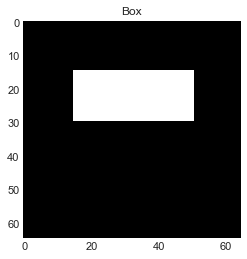

In [2]:
#given code, not editing much but have changed name from im to given_im since 
#I would like to use the name im for my own image.
#I will use matplotlib for my own work.

w, h = 65, 65
shape = [(50, 29), (w-50, h-50)]

given_im = Image.new("I", (w, h))
img=ImageDraw.Draw(given_im)
img.rectangle(shape, fill="white", outline="white")
pylab.imshow(given_im)
pylab.title("Box")
pylab.grid(False)
pylab.show()

Text(0.5, 1.0, 'Basic Shape - Glasses')

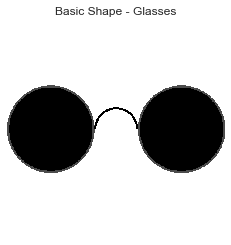

In [3]:
size=(500, 500) #image size

left_loc=[(0, 150), (200, 350)] #position of left circle
right_loc=[(300, 150), (500, 350)] #position of middle arc
middle_loc=[(200, 200), (300, 300)] #position of right circle

im=Image.new("I", size, color="white") #create canvas to draw on
shape=ImageDraw.Draw(im) #initialise drawing

shape.ellipse(left_loc, outline="red", fill="black", width=5) #draw left circle
shape.ellipse(right_loc, outline="red", fill="black", width=5) #draw middle arc
shape.arc(middle_loc, start=180, end=360, fill="black", width=5) #draw right circle

plt.imshow(im) #show image
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Basic Shape - Glasses") #give title

## Task 2

Perform a Fourier analysis on your images. Your code should do each of the following:
- draws 2 separate images
- takes the 2D discrete Fourier transform of one of the images (HINT: using the numpy package, look at fft2 and fftshift)
- applies a gaussian filter to the image
- takes the inverse transform of the image (HINT: using the numpy package, look at ifft2)
- displays the blurred image

I have already drawn two separate images in Task 1 so I shall not repeat this. Instead I shall simply use them given that I already have references to them with the given_im and im variables.
I shall do these steps for each image in turn:
- I shall convert the image to an array
- I shall use np.fft2 on the image array
- I shall then shift the transform using fftshift
- I shall then compute the magnitude spectrum of the image since we cannot plot the Fourier transform directly. The magnitude spectrum is given by $\operatorname{log}\left( \operatorname{abs}\left({FT}\right) \right)$.
- I shall apply a blur to the image using scipy.ndimage.gaussian_filter. I could create my own function, but this library would do the same thing anyways and the function would be complicated enough since it would require convolutions and whatnot. The filter is given by computing $\operatorname{g}(x,y)= \frac{1}{2 \pi \sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$ and doing a convolution with the initial signal i.e. the image.
- I shall compute the magnitude spectrum of the filtered image
- The example outputs for a plot of the Fourier transform are of the magnitude spectra. So, I shall plot the magnitude spectra of both the filtered and unfiltered images
- I shall plot the blurred image

In [4]:
#attempt at creating an array in a DataFrame
im_arr = np.frombuffer(im.tobytes(), dtype=np.uint8).tolist()
im_arr = np.reshape(im_arr, (im.size[1], im.size[0]*4))
im_arr = list(map(lambda x: np.reshape(x, (-1, 4)), im_arr))
im_df=pd.DataFrame([im_arr])
im_df=im_df.T
im_df.tail()

,0
495,"[[255, 0, 0, 0], [255, 0, 0, 0], [255, 0, 0, 0..."
496,"[[255, 0, 0, 0], [255, 0, 0, 0], [255, 0, 0, 0..."
497,"[[255, 0, 0, 0], [255, 0, 0, 0], [255, 0, 0, 0..."
498,"[[255, 0, 0, 0], [255, 0, 0, 0], [255, 0, 0, 0..."
499,"[[255, 0, 0, 0], [255, 0, 0, 0], [255, 0, 0, 0..."


In [5]:
#DataFrame with all the data
test = im_df[0].apply(lambda x: pd.Series(list(x)))
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,"[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]","[255, 0, 0, 0]"

TypeError: Image data of dtype object cannot be converted to float

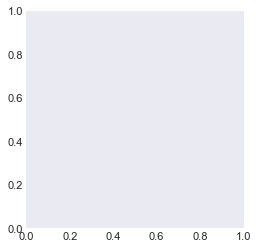

In [6]:
#Yet this does not work
plt.imshow(test.values)

Text(0.5, 1.0, 'Basic Shape - Glasses')

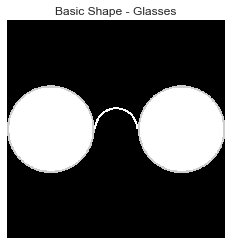

In [7]:
#realising that DataFrames and Images do not go hand in hand particularly, I decided to forgo the DataFrame idea

img_vals=np.array(im) #the easy way

#plot to make sure it worked
plt.imshow(img_vals) #plot
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Basic Shape - Glasses") #give title

In [8]:
img_vals=np.array(given_im) #using the example image

FT=np.fft.fft2(img_vals) #find Fourier transform
fshift = np.fft.fftshift(FT) #shift transform
magnitude_spectrum = np.log(np.abs(fshift)) #find the magnitude spectrum

GAUSS=scipy.ndimage.gaussian_filter(img_vals, 7) #add blur to image
GAUSS_FT=np.fft.fft2(GAUSS) #find Fourier transform of filtered image
GAUSS_fshift = np.fft.fftshift(GAUSS_FT) #shift the transform
GAUSS_magnitude_spectrum=np.log(np.abs(GAUSS_fshift)) #find the magnitude spectrum

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0.5, 1.0, 'Basic Shape - Box')

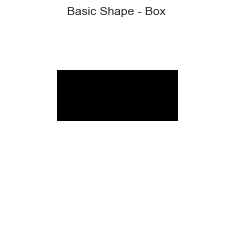

In [9]:
#plot the image being examined
plt.imshow(img_vals) #plot
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Basic Shape - Box") #give title

Text(0.5, 1.0, 'Box Magnitude Spectrum')

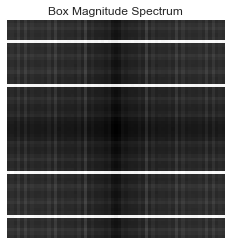

In [10]:
#plot the magnitude spectrum squared for the original image
plt.imshow(magnitude_spectrum)
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Box Magnitude Spectrum") #give title

Text(0.5, 1.0, 'Box Filtered Magnitude Spectrum')

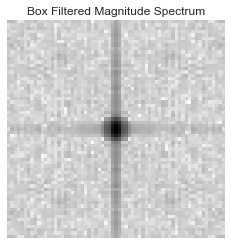

In [11]:
#plot filtered magnitude spectrum squared
plt.imshow(GAUSS_magnitude_spectrum)
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Box Filtered Magnitude Spectrum") #give title

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 1.0, 'Box - Filtered')

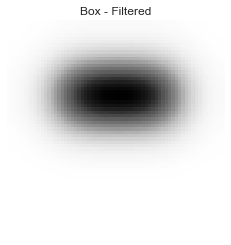

In [12]:
#plot the filtered image
plt.imshow(np.fft.ifft2(GAUSS_FT).astype('float'))
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Box - Filtered") #give title

In [13]:
img_vals=np.array(im) #do the glasses image now

FT=np.fft.fft2(img_vals) #find Fourier transform
fshift = np.fft.fftshift(FT) #shift transform
magnitude_spectrum = np.log(np.abs(fshift)) #find the magnitude spectrum

GAUSS=scipy.ndimage.gaussian_filter(img_vals, 7) #add blur to image
GAUSS_FT=np.fft.fft2(GAUSS) #find Fourier transform of filtered image
GAUSS_fshift = np.fft.fftshift(GAUSS_FT) #shift the transform
GAUSS_magnitude_spectrum=np.log(np.abs(GAUSS_fshift)) #find the magnitude spectrum

Text(0.5, 1.0, 'Basic Shape - Glasses')

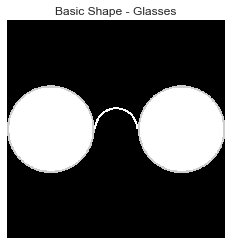

In [14]:
#plot image
plt.imshow(img_vals)
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Basic Shape - Glasses") #give title

Text(0.5, 1.0, 'Glasses Magnitude Spectrum')

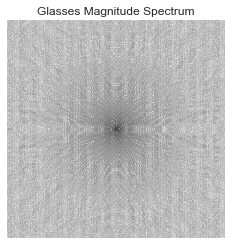

In [15]:
#plot magnitude spectrum of unfiltered image
plt.imshow(magnitude_spectrum)
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Glasses Magnitude Spectrum") #give title

Text(0.5, 1.0, 'Glasses Filtered Magnitude Spectrum')

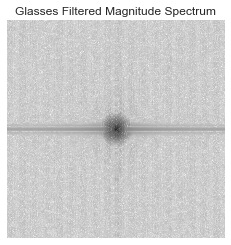

In [16]:
#plot magnitude spectrum of filtered image
plt.imshow(GAUSS_magnitude_spectrum)
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Glasses Filtered Magnitude Spectrum") #give title

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 1.0, 'Glasses - Filtered')

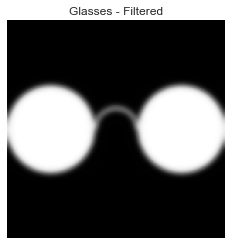

In [17]:
#plot filtered image
plt.imshow(np.fft.ifft2(GAUSS_FT).astype('float'))
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Glasses - Filtered") #give title

## Task 3

Format your code so that the Fourier analysis is contained in a function that can be applied to
any image you draw

Looking ahead to Task 4 and 5, I shall make my function plot the image, magnitude spectrum, phase spectrum and blurred image and return all of these as arrays too. This will accomplish all that was required in Task 2 and will allow me tackle the later tasks with more ease.

In [18]:
def Fourier_Analysis(image):
    """Given an image, this will return and plot
    the image, magnitude spectrum and phase spectrum"""

    fig, ax = plt.subplots(3, figsize=(15,15)) #initialise plot
    img_vals=np.array(image) #in case an image and not an array is inputted
    

    FT=np.fft.fft2(img_vals) #compute Fourier transform
    fshift = np.fft.fftshift(FT) #shift transform
    magnitude_spectrum = np.log(np.abs(fshift)) #find the magnitude spectrum
    phase_spectrum = np.angle(fshift) #find the phase spectrum
    new_img_vals=img_vals #"blurred image" is the same image here
    
    #show original image
    ax[0].imshow(img_vals) #plot original image
    ax[0].grid(False) #hide grid
    ax[0].axis('off') #hide axes
    ax[0].set_title("Image") #give title
    #show the magnitude spectrum
    ax[1].imshow(magnitude_spectrum) #plot magnitude spectrum
    ax[1].grid(False) #hide grid
    ax[1].axis('off') #hide axes
    ax[1].set_title("Magnitude Spectrum") #give title
    #show the phase spectrum
    ax[2].imshow(phase_spectrum) #plot pahse spectrum
    ax[2].grid(False) #hide grid
    ax[2].axis('off') #hide axes
    ax[2].set_title("Phase Spectrum") #give title
    
    return img_vals, magnitude_spectrum, phase_spectrum,  #return the three images as arrays

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[5.2058819 , 4.79767104, 5.41449065, ..., 5.41449065, 4.79767104,
         5.2058819 ],
        [4.50909817, 4.10088732, 4.71770693, ..., 4.71770693, 4.10088732,
         4.50909817],
        [3.85012725, 3.4419164 , 4.05873601, ..., 4.05873601, 3.4419164 ,
         3.85012725],
        ...,
        [3.85012725, 3.4419164 , 4.05873601, ..., 4.05873601, 3.4419164 ,
         3.85012725],
        [4.50909817, 4.10088732, 4.71770693, ..., 4.71770693, 4.10088732,
         4.50909817],
        [5.2058819 , 4.79767104, 5.41449065, ..., 5.41449065, 4.79767104,
         5.2058819 ]]),
 array([[-1.06330828,  2.07828437,  2.07828437, ...,  2.07828437,
          2.07828437, -1.06330828],
        [ 3.09326046, -0.04833219, -0.04833219, ..., -0.04833219,
         -0.04833219,  3.093

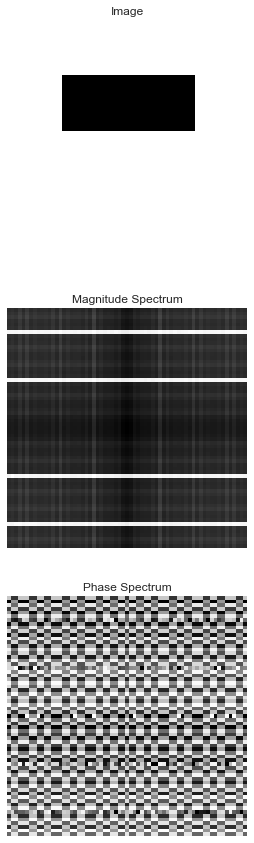

In [19]:
#simple test
Fourier_Analysis(given_im)

## Task 4

Your code needs to do the following to a given image "cat.jpg":
- Display the original image
- Compute the 2-dimensional discrete Fourier Transform
- Shift the zero-frequency component to the centre of the spectrum
- Take the log of the spectrum to compress the range of value
- Display the Magnitude Spectrum image

I can simply just plug the image into my function from Task 3. Unfortunately the new image is in colour, so I have to convert it to greyscale before I can use it, or alternatively do each rgb component separately before combining them. Using a black and white image strikes me as the easiest solution, so I will start with that.

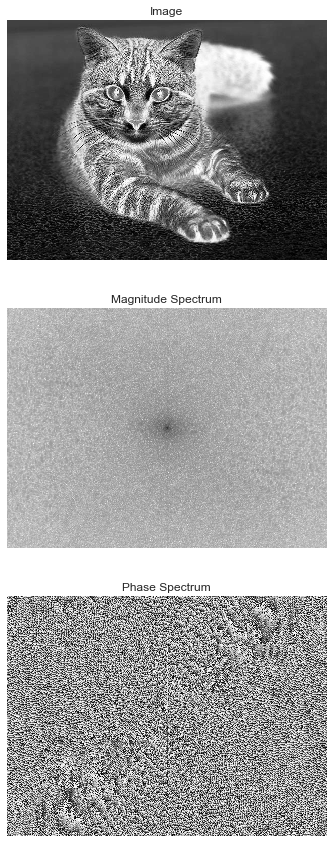

In [20]:
x,y,z=Fourier_Analysis(Image.open("cat.jpg").convert('L')) #read in image as black and white

I could split the image into it's RGB components using Image.open("cat.jpg").split() and recombine them later to keep the colour of the image. I don't believe it is necessary to keep the colour for this task however, so I shall content myself with the black and white analysis. Looking forward to Task 5, I think it is more beneficial to try and reconstruct the image from the phase and magnitude spectrum.

Text(0.5, 1.0, 'Reconstucted Image from Magnitude Spectrum')

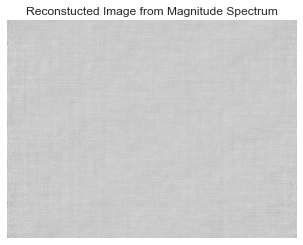

In [21]:
exp=np.exp(y)*(np.sin(np.pi/2)*1j+np.cos(np.pi/2)) #undo the log operation and pick an arbitrary phase of pi/2
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real1=untrans.real #take the real component
plt.imshow(real1) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Magnitude Spectrum") #give title

We clearly cannot see anything from this reconstruction. I shall move onto the phase.

Text(0.5, 1.0, 'Reconstucted Image from Phase Spectrum')

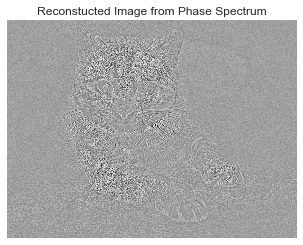

In [22]:
exp=(np.sin(z)*1j+np.cos(z)) #pick an arbitrary magnitude of 1
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real2=untrans.real #take the real component
plt.imshow(real2) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Phase Spectrum") #give title

We can see an outline of a cat from this construction, but it is still hard to tell much.

Text(0.5, 1.0, 'Reconstucted Image from Both Spectra')

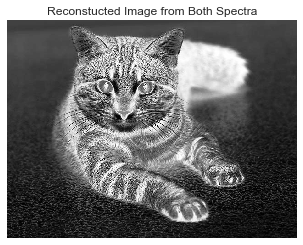

In [23]:
exp=np.exp(y)*(np.sin(z)*1j+np.cos(z)) #using both magnitude and phase data
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real3=untrans.real #take the real part
plt.imshow(real3) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Both Spectra") #give title

This gives us the full image again, as expected.

Text(0.5, 1.0, 'Reconstucted Image from Both Spectra')

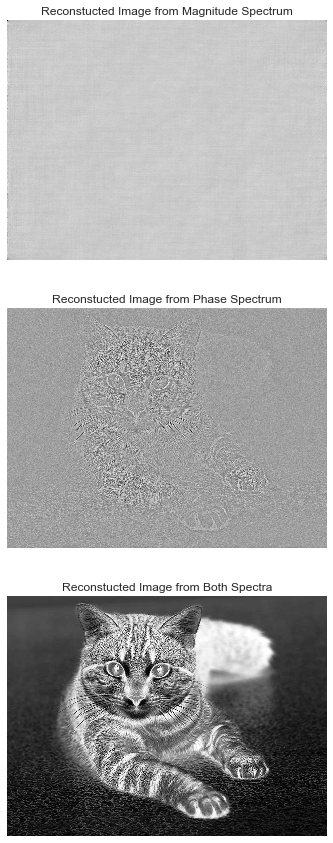

In [24]:
#show all together

fig, ax = plt.subplots(3, figsize=(15,15)) #initialise plot
ax[0].imshow(real1) #plot first image
ax[0].grid(False) #hide grid
ax[0].axis('off') #hide axes
ax[0].set_title("Reconstucted Image from Magnitude Spectrum") #title
ax[1].imshow(real2) #plot second image
ax[1].grid(False) #hide grid
ax[1].axis('off') #hide axes
ax[1].set_title("Reconstucted Image from Phase Spectrum") #title
ax[2].imshow(real3) #plot third image
ax[2].grid(False) #hide grid
ax[2].axis('off') #hide axes
ax[2].set_title("Reconstucted Image from Both Spectra") #title

I shall repeat this with a Gaussian filter on the image to examine what the effect of that would be.

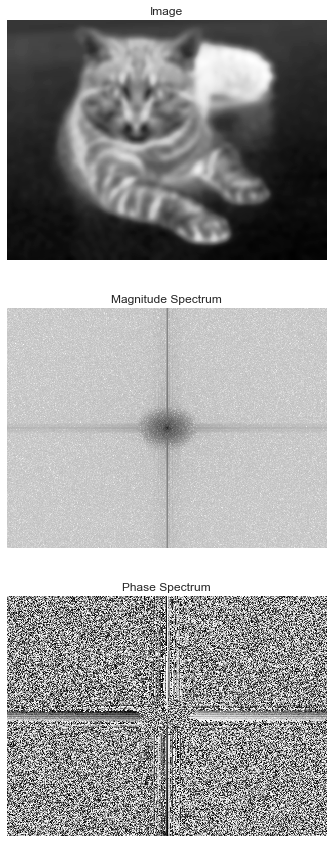

In [25]:
img_vals=np.asarray(Image.open("cat.jpg").convert('L')) #read in image as black and white
new_img_vals=scipy.ndimage.gaussian_filter(img_vals, 5) #filter the image
x,y,z=Fourier_Analysis(new_img_vals) #call function to get arrays

Text(0.5, 1.0, 'Reconstucted Image from Magnitude Spectrum')

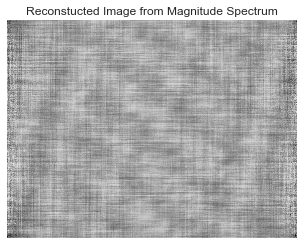

In [26]:
exp=np.exp(y)*(np.sin(np.pi/2)*1j+np.cos(np.pi/2)) #undo the log operation and pick an arbitrary phase of pi/2
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real1=untrans.real #take the real component
plt.imshow(real1) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Magnitude Spectrum") #give title

This looks a great deal different than the previous one, almost like a patchwork.

Text(0.5, 1.0, 'Reconstucted Image from Phase Spectrum')

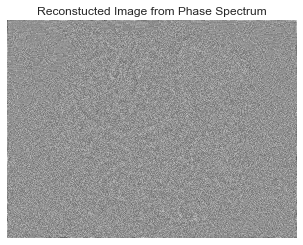

In [27]:
exp=(np.sin(z)*1j+np.cos(z)) #pick an arbitrary magnitude of 1
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real2=untrans.real #take the real component
plt.imshow(real2) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Phase Spectrum") #give title

I cannot make out a cat from this image. This means that any blur to an image will more or less mean I certainly need both spectra to identify the image. Before, I could plausibly get away with just the phase spectrum.

Text(0.5, 1.0, 'Reconstucted Image from Both Spectra')

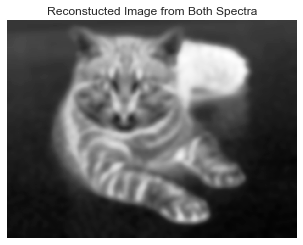

In [28]:
exp=np.exp(y)*(np.sin(z)*1j+np.cos(z)) #using both magnitude and phase data
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real3=untrans.real #take the real part
plt.imshow(real3) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Both Spectra") #give title

We obtain our blurry cat.

Text(0.5, 1.0, 'Reconstucted Image from Both Spectra')

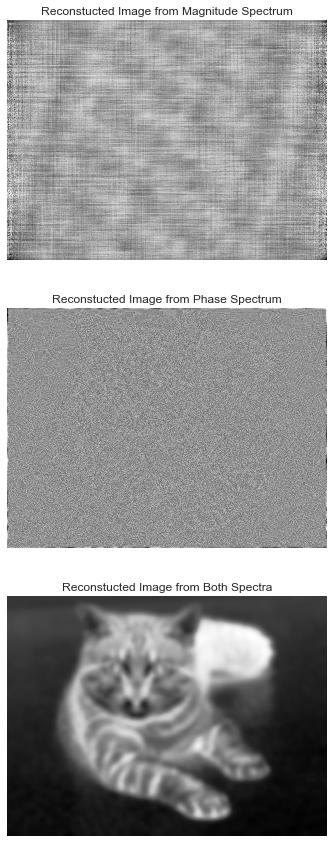

In [29]:
#show all together

fig, ax = plt.subplots(3, figsize=(15,15)) #initialise plot
ax[0].imshow(real1) #plot first image
ax[0].grid(False) #hide grid
ax[0].axis('off') #hide axes
ax[0].set_title("Reconstucted Image from Magnitude Spectrum") #title
ax[1].imshow(real2) #plot second image
ax[1].grid(False) #hide grid
ax[1].axis('off') #hide axes
ax[1].set_title("Reconstucted Image from Phase Spectrum") #title
ax[2].imshow(real3) #plot third image
ax[2].grid(False) #hide grid
ax[2].axis('off') #hide axes
ax[2].set_title("Reconstucted Image from Both Spectra") #title

## Task 5

Given a magnitude spectrum image "mag_spec.jpg", reconstruct and display the original image.

I expect this task to be virtually impossible since we have no phase data, and it is not clear how the magnitude spectrum was obtained. I shall assume that the magnitude spectrum was obtained by finding the magnitudes of the shifted (using np.fft.fftshift) Fourier transform (using fft.fft2) i.e. was not logged at the end. I will also assume there was no filter applied. If there was this would alter the image we obtain but we would still be left without knowing the original image. It seems presumptuous to assume any filtering was done before we can see the actual image, and we can't here.

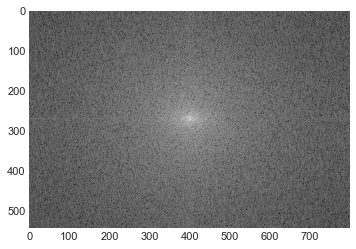

In [30]:
im = Image.open("mag_spec.jpg")
y=np.asarray(im)
plt.imshow(im)

This doesn't have the patchwork pattern our filtered magnitude spectrum did previously, so asssuming there is no filter seems safe to me.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Reconstucted Image from Magnitude Spectrum')

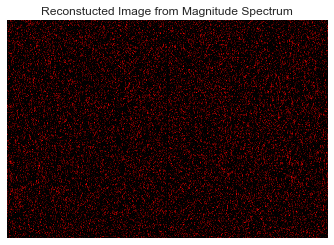

In [31]:
exp=y*(np.sin(np.pi/2)*1j+np.cos(np.pi/2)) #undo the log operation and pick an arbitrary phase of pi/2
ishift=np.fft.ifftshift(exp) #unshift
untrans=np.fft.ifft2(ishift) #undo the transform
real=untrans.real #take the real component
plt.imshow(real) #plot it
plt.grid(False) #hide grid
plt.axis('off') #hide axes
plt.title("Reconstucted Image from Magnitude Spectrum") #give title

We duly obtain a useless image because we are missing all of the phase data. All I can say is we see a seemingly random distribution of points in the image, but in all honesty were are missing half of the information and unsurprisingly have no idea what the image is of. The many dots leads to me believe there are spot-like regions of light and dark in the original image. There is not much more I can comment on.